# Week 2

Task 1

In [95]:
import pandas as pd
import numpy as np
from scipy import spatial
import re

In [96]:
file_obj = open('sentences.txt', 'r')

In [97]:
import re
data_list = list(file_obj)
data_list_st = []
for line in data_list:
    data_list_st.append(re.split('[^a-z]', line.strip().lower()))

In [101]:
data_list_st_ = []
for line in data_list_st:
    line = [x for x in line if x != '']
    data_list_st_.append(line)

In [103]:
words = set()
for line in data_list_st_:
    for word in line:
        words.add(word)

In [105]:
len(words)

254

In [106]:
set_values = range(len(words))

# converting set to dictionary
dictionary = dict(zip(words, set_values))

In [110]:
words_matrix = np.zeros((len(data_list_st), len(dictionary)))

In [127]:
dictionary['cats']

93

In [129]:
n = 0
for line in data_list_st_:
    unique, counts = np.unique(line, return_counts=True)
    word_counts = dict(zip(unique, counts))
    for item in word_counts.keys():
        words_matrix[n][dictionary[item]] = word_counts[item]
    n = n+1    

In [137]:
len(words_matrix)

22

In [148]:
data = pd.DataFrame(columns=['row_num', 'dist'])
for i in range(1, len(words_matrix)):
    df2 = pd.DataFrame([[i, spatial.distance.cosine(words_matrix[0], words_matrix[i])]], columns=['row_num', 'dist'])
    data = data.append(df2)

In [149]:
pd.DataFrame([[i, spatial.distance.cosine(words_matrix[0], words_matrix[3])]], columns=['row_num', 'dist'])

,row_num,dist
0,21,0.895172


In [153]:
data.sort_values('dist', ascending = True).head(2)

,row_num,dist
0,6,0.732739
0,4,0.777089


Task 2

In [240]:
import math
def fun(x):
    return np.sin(x / 5.0) * np.exp(x / 10) + 5 * np.exp(-x / 2)

In [202]:
fun(15)

0.6352214195786656

In [203]:
DIM = 4
points = [1, 4, 10, 15]

In [204]:
X = np.ones((DIM, DIM))
Y = np.zeros(DIM)

In [205]:
n = 0
for point in points:
    for dim in range(1, DIM):
        X[n][dim] = point ** dim
    Y[n] = fun(point)
    n = n + 1

In [206]:
from scipy import linalg
w = linalg.solve(X, Y)
w

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

# Week 3

In [207]:
import scipy
from scipy.optimize import minimize

In [208]:
for x_st in [2, 30]:
    w_opt = scipy.optimize.minimize(fun=fun, x0=x_st, method = 'BFGS')
    print(w_opt.x, fun(w_opt.x))

[4.13627628] [1.74526829]
[25.88019321] [-11.89889467]


Text(0.5, 1.0, 'Функция')

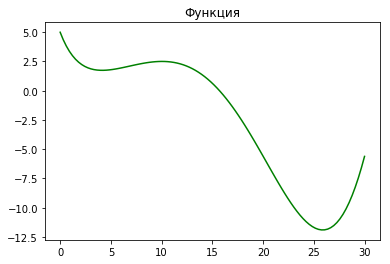

In [226]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 30, num=100)
y = fun(x)

plt.plot(x, y, 'g',  label = 'f')
plt.title('Функция')

In [235]:
from scipy.optimize import rosen, differential_evolution
bounds = [(1,30)]
result = differential_evolution(fun, bounds)
result.x, result.fun

(array([25.88019279]), array([-11.89889467]))

In [236]:
result.nfev

68

In [231]:
w_opt.nfev

21

Text(0.5, 1.0, 'Функция')

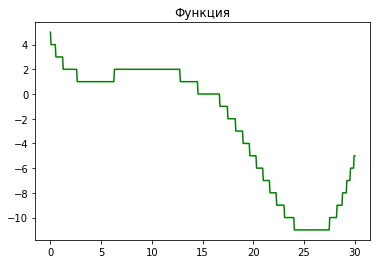

In [249]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0, 30, num=500)
y = fun(x)
y = [int(y_) for y_ in y]

plt.plot(x, y, 'g',  label = 'f')
plt.title('Функция')

In [246]:
def h(x):
    return int(fun(x))

In [259]:
for x_st in [30]:
    w_opt = scipy.optimize.minimize(fun=h, x0=x_st, method = 'BFGS')
    print(x_st, w_opt.x, w_opt.fun)

30 [30.] -5


In [258]:
bounds = [(1,30)]
result = differential_evolution(h, bounds)
result.x, result.fun

(array([25.18688709]), -11.0)